In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

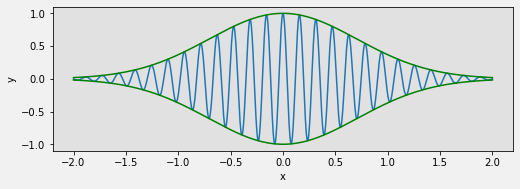

In [2]:
fig = plt.figure(figsize=(8,2.5), facecolor="#f1f1f1")
# axes coordinate as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

ax.plot(x, y1*y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')

ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")


Text(2, 0.1, 'Equation: $\\partial t \\Psi = \\hat{H} \\Psi$')

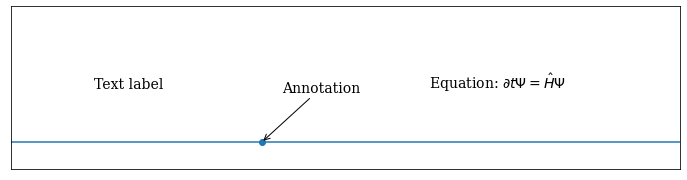

In [5]:
# annotation example
fig, ax = plt.subplots(figsize=(12,3))
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim([-0.5, 3.5])
ax.set_ylim([-0.05, 0.25])
ax.axhline(0)

#text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1,0,"o")
ax.annotate("Annotation", fontsize=14, family = "serif", xy=(1,0), xycoords="data", xytext=(+20, +50), textcoords="offset points", 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc, rad=.5"))

# equation
ax.text(2, 0.1, r"Equation: $\partial t \Psi = \hat{H} \Psi$", fontsize=14, family="serif")

### Setting the axes ticks
---

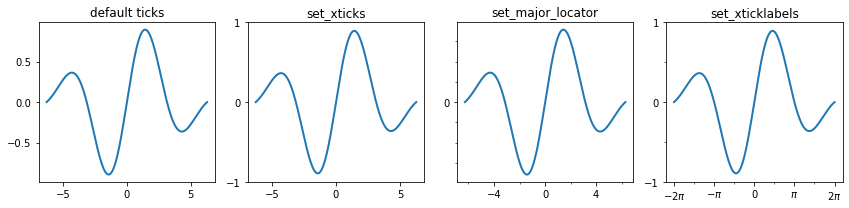

In [10]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = np.sin(x)*np.exp(-x**2/20)

fig, ax = plt.subplots(1, 4, figsize=(12,3))

ax[0].plot(x, y, lw=2)
ax[0].set_title("default ticks")

ax[1].plot(x,y, lw=2)
ax[1].set_title("set_xticks")
ax[1].set_xticks([-5, 0, 5])
ax[1].set_yticks([-1, 0, 1])

ax[2].plot(x,y, lw=2)
ax[2].set_title("set_major_locator")
ax[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1,  0,  1]))
ax[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8)) 
ax[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

ax[3].plot(x, y, lw=2) 
ax[3].set_title("set_xticklabels") 
ax[3].set_yticks([-1, 0, 1])
ax[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
ax[3].set_xticklabels([r'$-2\pi$', r'$-\pi$', 0, r'$\pi$',  r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([-3 * np.pi / 2,  -np.pi / 2, 0, np.pi  /  2,  3  *  np.pi  /  2])
ax[3].xaxis.set_minor_locator(x_minor_ticker) 
ax[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()

#### Log plots
---

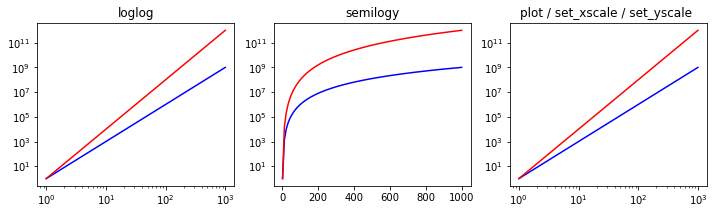

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
x = np.linspace(1, 1e3, 100)
y1, y2 = x**3, x**4

ax[0].set_title("loglog")
ax[0].loglog(x, y1, 'b', x, y2, 'r')

ax[1].set_title("semilogy")
ax[1].semilogy(x, y1, 'b', x, y2, 'r')

ax[2].set_title("plot / set_xscale / set_yscale ")
ax[2].plot(x,y1,'b', x, y2, 'r')
ax[2].set_xscale("log")
ax[2].set_yscale("log")

#### Twin axes
---

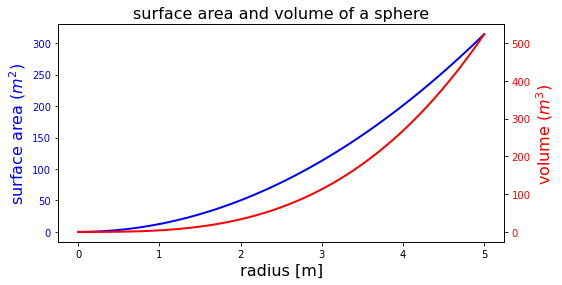

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4))

r = np.linspace(0,5,100)
a = 4*np.pi*r**2 # area
v = (4*np.pi/3)*r**3 ## volume

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")


### Spine
---

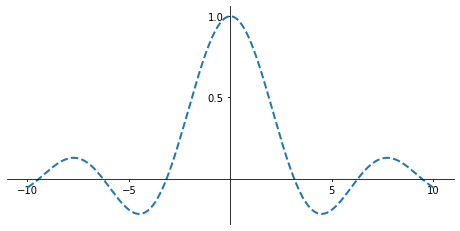

In [16]:
x = np.linspace(-10, 10, 500)
y = np.sin(x)/x

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x,y,lw=2, ls='--')

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# move bottom and left spine to x = 0 and y = 0
ax.spines["bottom"].set_position(('data', 0))
ax.spines["left"].set_position(('data', 0))

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white', 'edgecolor': 'white'})